In [1]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

C:\Users\Annisa\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
dataset = pd.read_csv("wbc.csv")
dataset=dataset[dataset.bare_nuclei!='?']
dataset=dataset.reset_index()
dataset['bare_nuclei']=dataset['bare_nuclei'].astype(object).astype(int)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
index                 683 non-null int64
clump_thickness       683 non-null int64
cell_size             683 non-null int64
cell_shape            683 non-null int64
marginal_adhesion     683 non-null int64
epitelial_cellsize    683 non-null int64
bare_nuclei           683 non-null int32
bland_chromatin       683 non-null int64
normal_nucleoli       683 non-null int64
mitoses               683 non-null int64
jenis                 683 non-null int64
dtypes: int32(1), int64(10)
memory usage: 56.1 KB


In [3]:
X = dataset.drop([dataset.columns[-1]], axis=1)
y = dataset.jenis

In [4]:
seed = 42

In [5]:
test_size = 0.33

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [7]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [8]:
print(model)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)


In [9]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [10]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.58%


In [11]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred)

array([[140,   2],
       [  8,  76]])

In [12]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [13]:
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred)
print (('Akurasi: %.4f') % (accuracy))
print (('Precision: %.4f') % (precision[1]))
print (('Recall: %.4f') % (recall[1]))
print (('F1: %.4f') % (f1[1]))

Akurasi: 0.9558
Precision: 0.9744
Recall: 0.9048
F1: 0.9383


In [14]:
params_grid = {
    'max_depth': [1,3, 5, 7],
    'n_estimators': [50,100],
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3]
    
}

In [15]:
params_fixed = {
    'objective': 'binary:logistic',
    'silent': 1
}

In [16]:
from sklearn.cross_validation import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [17]:
cv = StratifiedKFold(y, n_folds=10, shuffle=True, random_state=seed)

In [18]:
bst_grid = GridSearchCV(
    estimator=XGBClassifier(**params_fixed, seed=seed),
    param_grid=params_grid,
    cv=cv,
    scoring='accuracy'
)

In [19]:
bst_grid.fit(X, y)

GridSearchCV(cv=sklearn.cross_validation.StratifiedKFold(labels=[2 2 ..., 4 4], n_folds=10, shuffle=True, random_state=42),
       error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=42, silent=1, subsample=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 3, 5, 7], 'n_estimators': [50, 100], 'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [20]:
bst_grid.grid_scores_

C:\Users\Annisa\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.91801, std: 0.01994, params: {'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 50},
 mean: 0.91947, std: 0.02006, params: {'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 100},
 mean: 0.94290, std: 0.02113, params: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 50},
 mean: 0.94143, std: 0.01959, params: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100},
 mean: 0.94436, std: 0.03041, params: {'learning_rate': 0.001, 'max_depth': 5, 'n_estimators': 50},
 mean: 0.94436, std: 0.03041, params: {'learning_rate': 0.001, 'max_depth': 5, 'n_estimators': 100},
 mean: 0.94143, std: 0.03185, params: {'learning_rate': 0.001, 'max_depth': 7, 'n_estimators': 50},
 mean: 0.94290, std: 0.03015, params: {'learning_rate': 0.001, 'max_depth': 7, 'n_estimators': 100},
 mean: 0.93704, std: 0.01849, params: {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50},
 mean: 0.95608, std: 0.01297, params: {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 100

In [21]:
print("Best accuracy obtained: {0}".format(bst_grid.best_score_))
print("Parameters:")
for key, value in bst_grid.best_params_.items():
    print("\t{}: {}".format(key, value))


Best accuracy obtained: 0.9736456808199122
Parameters:
	learning_rate: 0.2
	max_depth: 3
	n_estimators: 50


In [22]:
bst_grid.best_estimator_

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.2, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=50, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=42, silent=1, subsample=1)

In [23]:
model2=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.2, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=50, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=42, silent=1, subsample=1)

In [24]:
model2.fit(X_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.2, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=50, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=42, silent=1, subsample=1)

In [25]:
y_pred2 = model2.predict(X_test)
predictions = [round(value) for value in y_pred2]

In [26]:
accuracy = accuracy_score(y_test, predictions)

In [27]:
accuracy = accuracy_score(y_test, predictions)
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred2)
print (('Akurasi: %.4f') % (accuracy))
print (('Precision: %.4f') % (precision[1]))
print (('Recall: %.4f') % (recall[1]))
print (('F1: %.4f') % (f1[1]))

Akurasi: 0.9646
Precision: 0.9750
Recall: 0.9286
F1: 0.9512


In [28]:
metrics.confusion_matrix(y_test, y_pred)

array([[140,   2],
       [  8,  76]])

In [29]:
params_grid2 = {
    'min_child_weight': [6,8,10,12],
    'subsample': [0.2,0.4,0.8,1],
    'reg_alpha': [10e-5, 10e-2, 0.1, 1, 100]
    
}

In [30]:
params_fixed = {
    'objective': 'binary:logistic',
    'silent': 1
}

In [31]:
bst_grid2 = GridSearchCV(
    estimator=XGBClassifier(**params_fixed, seed=seed),
    param_grid=params_grid2,
    cv=cv,
    scoring='accuracy'
)

In [32]:
bst_grid2.fit(X, y)

GridSearchCV(cv=sklearn.cross_validation.StratifiedKFold(labels=[2 2 ..., 4 4], n_folds=10, shuffle=True, random_state=42),
       error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=42, silent=1, subsample=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'min_child_weight': [6, 8, 10, 12], 'subsample': [0.2, 0.4, 0.8, 1], 'reg_alpha': [0.0001, 0.1, 0.1, 1, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [33]:
bst_grid2.grid_scores_

C:\Users\Annisa\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.96193, std: 0.01476, params: {'min_child_weight': 6, 'reg_alpha': 0.0001, 'subsample': 0.2},
 mean: 0.96925, std: 0.01201, params: {'min_child_weight': 6, 'reg_alpha': 0.0001, 'subsample': 0.4},
 mean: 0.97365, std: 0.01095, params: {'min_child_weight': 6, 'reg_alpha': 0.0001, 'subsample': 0.8},
 mean: 0.97072, std: 0.01301, params: {'min_child_weight': 6, 'reg_alpha': 0.0001, 'subsample': 1},
 mean: 0.96340, std: 0.01625, params: {'min_child_weight': 6, 'reg_alpha': 0.1, 'subsample': 0.2},
 mean: 0.96779, std: 0.01556, params: {'min_child_weight': 6, 'reg_alpha': 0.1, 'subsample': 0.4},
 mean: 0.97365, std: 0.01095, params: {'min_child_weight': 6, 'reg_alpha': 0.1, 'subsample': 0.8},
 mean: 0.97072, std: 0.01301, params: {'min_child_weight': 6, 'reg_alpha': 0.1, 'subsample': 1},
 mean: 0.96340, std: 0.01625, params: {'min_child_weight': 6, 'reg_alpha': 0.1, 'subsample': 0.2},
 mean: 0.96779, std: 0.01556, params: {'min_child_weight': 6, 'reg_alpha': 0.1, 'subsample': 0.4},
 m

In [34]:
print("Best accuracy obtained: {0}".format(bst_grid2.best_score_))
print("Parameters:")
for key, value in bst_grid2.best_params_.items():
    print("\t{}: {}".format(key, value))

Best accuracy obtained: 0.9751098096632503
Parameters:
	min_child_weight: 8
	reg_alpha: 0.0001
	subsample: 0.8


In [35]:
bst_grid2.best_estimator_

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=8, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0.0001, reg_lambda=1,
       scale_pos_weight=1, seed=42, silent=1, subsample=0.8)

In [36]:
model3=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=8, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0.0001, reg_lambda=1,
       scale_pos_weight=1, seed=42, silent=1, subsample=0.8)

In [37]:
model3.fit(X_train,y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=8, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0.0001, reg_lambda=1,
       scale_pos_weight=1, seed=42, silent=1, subsample=0.8)

In [38]:
y_pred3 = model3.predict(X_test)
predictions = [round(value) for value in y_pred3]

# tidak lebih baik dari model2

In [39]:
accuracy = accuracy_score(y_test, predictions)
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred3)
print (('Akurasi: %.4f') % (accuracy))
print (('Precision: %.4f') % (precision[1]))
print (('Recall: %.4f') % (recall[1]))
print (('F1: %.4f') % (f1[1]))

Akurasi: 0.9602
Precision: 0.9747
Recall: 0.9167
F1: 0.9448


In [40]:
metrics.confusion_matrix(y_test, y_pred)

array([[140,   2],
       [  8,  76]])

In [41]:
import matplotlib.pyplot as plt

In [42]:
print (model.feature_importances_)

[ 0.14159292  0.15044248  0.10840708  0.06415929  0.14823009  0.03097345
  0.19469027  0.09734514  0.06415929  0.        ]


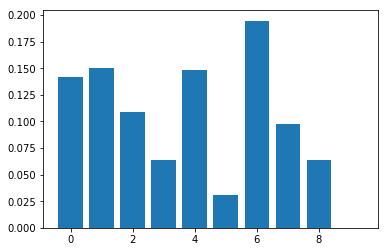

In [43]:
plt.bar(range(len(model.feature_importances_)),model.feature_importances_)
plt.show()

In [44]:
import xgboost as xgb

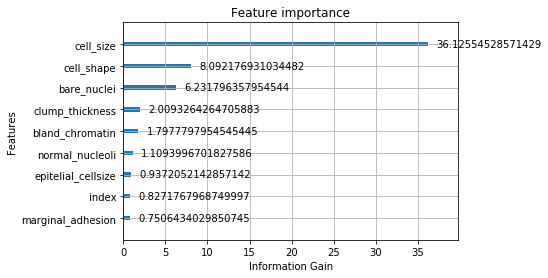

In [45]:
xgb.plot_importance(model,importance_type='gain',xlabel='Information Gain')
plt.show()

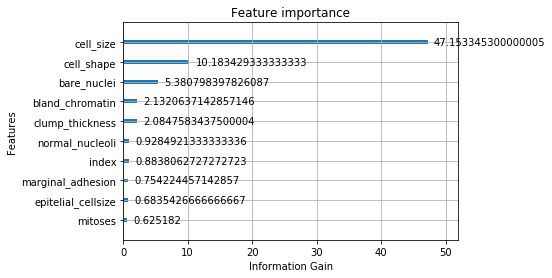

In [46]:
xgb.plot_importance(model2,importance_type='gain',xlabel='Information Gain')
plt.show()

In [47]:
model4=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.2, max_delta_step=0, max_depth=3,
       min_child_weight=8, missing=None, n_estimators=50, nthread=-1,
       objective='binary:logistic', reg_alpha=0.0001, reg_lambda=1,
       scale_pos_weight=1, seed=42, silent=1, subsample=0.8)

In [48]:
model4.fit(X_train,y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.2, max_delta_step=0, max_depth=3,
       min_child_weight=8, missing=None, n_estimators=50, nthread=-1,
       objective='binary:logistic', reg_alpha=0.0001, reg_lambda=1,
       scale_pos_weight=1, seed=42, silent=1, subsample=0.8)

In [49]:
y_pred4 = model4.predict(X_test)
predictions = [round(value) for value in y_pred4]

In [50]:
accuracy = accuracy_score(y_test, predictions)
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred4)
print (('Akurasi: %.4f') % (accuracy))
print (('Precision: %.4f') % (precision[1]))
print (('Recall: %.4f') % (recall[1]))
print (('F1: %.4f') % (f1[1]))

Akurasi: 0.9646
Precision: 0.9750
Recall: 0.9286
F1: 0.9512
